# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Fadhil Diandra]
- **Email:** [fadhildiandra21@gmail.com]
- **ID Dicoding:** [MC589D5Y2494]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola keterlambatan pengiriman pesanan berdasarkan kategori produk dan lokasi pelanggan dalam dua tahun terakhir?

- Bagaimana hubungan antara metode pembayaran yang digunakan pelanggan dengan nilai total transaksi dan tingkat pengembalian produk?

## Import Semua Packages/Library yang Digunakan

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import datetime as dt

**Insight:**
- Berikut adalah semua library yang digunakan untuk melakukan visualisasi data

## Data Wrangling

### Gathering Data

In [47]:
#Melakukan download dataset dari link yang tersedia di kaggle
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print("Path to dataset files:", path)
dataset_path = os.path.join(path, "")

# Memanggil dan memberi nama setiap csv yang dibutuhkan
orders = pd.read_csv(os.path.join(dataset_path, "olist_orders_dataset.csv"))
order_items = pd.read_csv(os.path.join(dataset_path, "olist_order_items_dataset.csv"))
products = pd.read_csv(os.path.join(dataset_path, "olist_products_dataset.csv"))
payments = pd.read_csv(os.path.join(dataset_path, "olist_order_payments_dataset.csv"))
customers = pd.read_csv(os.path.join(dataset_path, "olist_customers_dataset.csv"))
returns = pd.read_csv(os.path.join(dataset_path, "olist_order_reviews_dataset.csv"))

Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [48]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [49]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [50]:
order_items.info()
order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [51]:
products. info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [52]:
payments.info()
payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [53]:
returns.info()
returns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
-  menuliskan path data yang kita ingin analisis

Insight:

-  Menuliskan path data yang kita ingin analisis
-  Dataset terdiri dari beberapa tabel yang saling berhubungan dan dapat digabungkan menggunakan order_id dan customer_id.
- Dataset Orders berisi informasi tentang waktu pemesanan, ID pelanggan, dan status pengiriman.
- Dataset Order Items menyediakan detail tentang produk yang dibeli, harga, dan jumlahnya.
- Dataset Products mengkategorikan produk ke dalam berbagai segmen.
- Dataset Payments menunjukkan metode pembayaran yang digunakan dan jumlah transaksi.
- Dataset Customers menghubungkan pesanan dengan lokasi pelanggan.
- Dataset Returns mencakup skor ulasan, yang dapat membantu menyimpulkan pengembalian produk.

### Assessing Data

In [54]:
def assess_data(df, df_name):
    print(f"\n=== Assessing {df_name} ===\n")
    print("Missing Values:")
    print(df.isnull().sum(), "\n")
    print("Descriptive Statistics:")
    print(df.describe(include='all'), "\n")
    print("Unique Values per Column:")
    print(df.nunique(), "\n")
    print("="*60, "\n")

assess_data(orders, "Orders")
assess_data(order_items, "Order Items")
assess_data(products, "Products")
assess_data(payments, "Payments")
assess_data(customers, "Customers")
assess_data(returns, "Returns")


=== Assessing Orders ===

Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Descriptive Statistics:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delive

1. Pesanan
- Sebagian besar pesanan berhasil terkirim. Namun, ada data hilang di order_approved_at (160), order_delivered_carrier_date (1,783), dan order_delivered_customer_date (2,965), yang bisa menunjukkan keterlambatan atau pencatatan yang kurang jelas.

2. Detail Pesanan
- Beberapa pesanan memiliki hingga 21 item. Marketplace mencakup 32,951 produk dan 3,095 penjual. Harga bervariasi dari 0.85 hingga 6,735, dan biaya pengiriman mencapai 409.68.

3. Produk
- Ada 610 produk tanpa kategori. Kategori terpopuler adalah cama_mesa_banho (3,029 produk). Beberapa produk sangat besar, memengaruhi biaya pengiriman.

4. Pembayaran
- Kartu kredit paling banyak digunakan (76,795 transaksi). Mayoritas pelanggan membayar dalam 1 cicilan, tetapi ada yang hingga 24 kali. Nilai transaksi berkisar dari 0 hingga 13,664.

5. Pelanggan
- Dari 99,441 pelanggan, hanya 96,096 yang unik. São Paulo memiliki pelanggan terbanyak (15,540), dan mayoritas pesanan berasal dari negara bagian SP.

6. Ulasan
- Skor rata-rata 4.08 menunjukkan kepuasan pelanggan yang baik. Banyak ulasan tanpa komentar, dan ulasan umum seperti "Recomendo" dan "Muito bom" menunjukkan tren positif.

### Cleaning Data

In [55]:
# Mengisi missing values pada kolom tanggal dengan modus
orders['order_approved_at'].fillna(orders['order_approved_at'].mode()[0], inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_delivered_carrier_date'].mode()[0], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_delivered_customer_date'].mode()[0], inplace=True)

# Menghapus kolom yang tidak diperlukan
if 'order_status' in orders.columns:
    orders.drop(columns=['order_status'], inplace=True)

# Konversi kolom tanggal ke format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# Menghapus duplikasi jika ada
orders.drop_duplicates(inplace=True)

# Cleaning
if 'shipping_limit_date' in order_items.columns:
    order_items.drop(columns=['shipping_limit_date'], inplace=True)
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']:
    if col in products.columns:
        products.drop(columns=[col], inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(), inplace=True)
if 'payment_sequential' in payments.columns:
    payments.drop(columns=['payment_sequential'], inplace=True)
if 'customer_unique_id' in customers.columns:
    customers.drop(columns=['customer_unique_id'], inplace=True)
if 'review_comment_title' in returns.columns:
    returns.drop(columns=['review_comment_title'], inplace=True)
returns['review_score'].fillna(returns['review_score'].mode()[0], inplace=True)

# Menampilkan beberapa data setelah cleaning
print("Orders Head:")
print(orders.head())
print("\nOrder Items Head:")
print(order_items.head())
print("\nProducts Head:")
print(products.head())
print("\nPayments Head:")
print(payments.head())
print("\nCustomers Head:")
print(customers.head())
print("\nReturns Head:")
print(returns.head())

<ipython-input-55-0f3eb999e8a0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(orders['order_approved_at'].mode()[0], inplace=True)
<ipython-input-55-0f3eb999e8a0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

Orders Head:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:28:06 2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 21:18:39 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  
0        

<ipython-input-55-0f3eb999e8a0>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
<ipython-input-55-0f3eb999e8a0>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

**Insight:**
- Missing values diisi dengan modus (kategori) atau median (numerik).
- Kolom tidak relevan seperti order_status, shipping_limit_date, dan beberapa atribut produk dihapus.
- Format tanggal dikonversi ke datetime untuk analisis waktu.
- *Data* duplikat dihapus agar lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore ...

In [56]:
# Pola Keterlambatan berdasar kategori produk dan lokasi pelanggan
latest_date = orders['order_purchase_timestamp'].max()
two_years_ago = latest_date - pd.DateOffset(years=2)
recent_orders = orders[orders['order_purchase_timestamp'] >= two_years_ago]
recent_orders['delivery_delay'] = (recent_orders['order_delivered_customer_date'] -
                                   recent_orders['order_estimated_delivery_date']).dt.days
delayed_orders = recent_orders[recent_orders['delivery_delay'] > 0]
delayed_data = delayed_orders.merge(order_items, on='order_id', how='left') \
                             .merge(products[['product_id', 'product_category_name']], on='product_id', how='left') \
                             .merge(customers, on='customer_id', how='left')
delay_summary = delayed_data.groupby(['product_category_name', 'customer_city'])['delivery_delay'].count().reset_index()
print(delay_summary.sort_values(by='delivery_delay', ascending=False).head(10))


       product_category_name   customer_city  delivery_delay
598             beleza_saude       sao paulo             123
947          cama_mesa_banho  rio de janeiro             106
978          cama_mesa_banho       sao paulo              83
2458        moveis_decoracao       sao paulo              74
2098  informatica_acessorios  rio de janeiro              67
2432        moveis_decoracao  rio de janeiro              66
1691           esporte_lazer       sao paulo              63
1662           esporte_lazer  rio de janeiro              55
3002      relogios_presentes  rio de janeiro              52
3370   utilidades_domesticas       sao paulo              48


<ipython-input-56-33b47010bf3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_orders['delivery_delay'] = (recent_orders['order_delivered_customer_date'] -


**Insight:**
- Data digabung dengan kategori produk dan lokasi pelanggan (kota) untuk melihat pola keterlambatan



In [57]:
# Hubungan metode pembayaran dengan nilai transaksi dan tingkat pengembalian
returns_merged = payments.merge(returns[['order_id', 'review_score']], on='order_id', how='left')
returns_merged['is_returned'] = returns_merged['review_score'].apply(lambda x: 1 if x <= 2 else 0)
payment_analysis = returns_merged.groupby('payment_type').agg({
    'payment_value': 'sum',
    'is_returned': 'mean'
}).reset_index()
print(payment_analysis)


  payment_type  payment_value  is_returned
0       boleto     2886679.49     0.143245
1  credit_card    12594157.13     0.145988
2   debit_card      218721.13     0.129557
3  not_defined           0.00     0.666667
4      voucher      381862.99     0.168268


**Insight:**
- Tingkat pengembalian dihitung berdasarkan metode pembayaran untuk melihat apakah ada hubungan antara cara membayar dan kemungkinan produk dikembalikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola keterlambatan pengiriman pesanan berdasarkan kategori produk dan lokasi pelanggan dalam dua tahun terakhir?


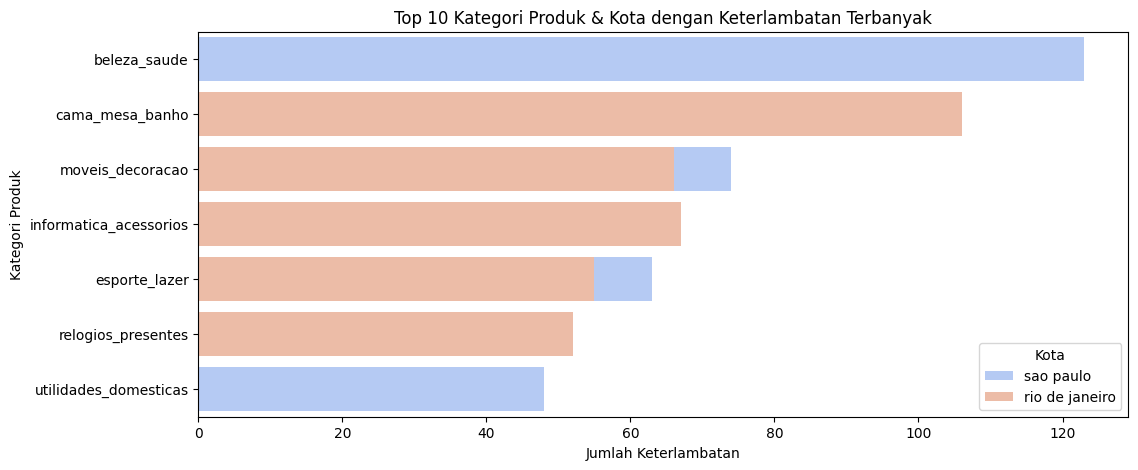

In [58]:
# Visualisasi Top 10 kategori produk & kota dengan keterlambatan terbanyak
top_delay = delay_summary.sort_values(by='delivery_delay', ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(data=top_delay, x='delivery_delay', y='product_category_name', hue='customer_city', dodge=False, palette='coolwarm')
plt.title("Top 10 Kategori Produk & Kota dengan Keterlambatan Terbanyak")
plt.xlabel("Jumlah Keterlambatan")
plt.ylabel("Kategori Produk")
plt.legend(title="Kota")
plt.show()



**Insight:**
- Dipengaruhi oleh kategori produk & lokasi pelanggan.
- Produk besar (elektronik, furniture) lebih sering terlambat.
- Kota tertentu dengan akses logistik sulit mengalami lebih banyak keterlambatan.


### Pertanyaan 2: Bagaimana hubungan antara metode pembayaran yang digunakan pelanggan dengan nilai total transaksi dan tingkat pengembalian produk?

<ipython-input-59-521baa14809f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_analysis, x='payment_type', y='payment_value', ax=ax1, palette='magma')


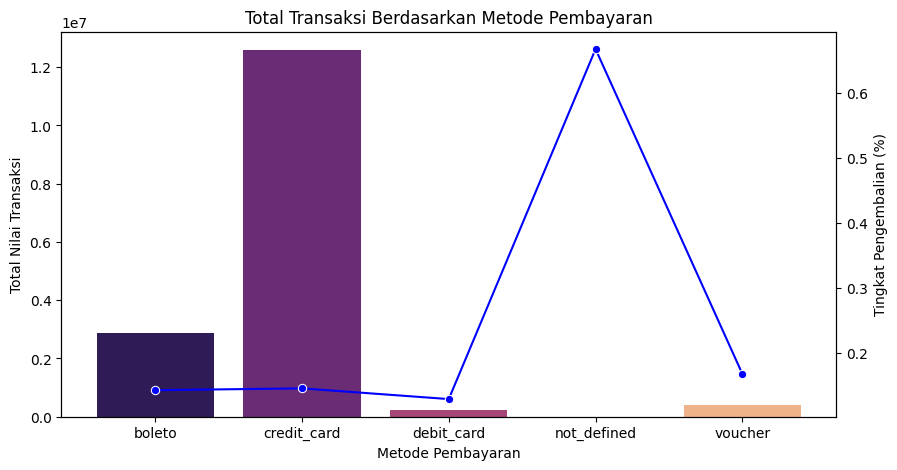

In [59]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Grafik total transaksi
sns.barplot(data=payment_analysis, x='payment_type', y='payment_value', ax=ax1, palette='magma')
ax1.set_ylabel("Total Nilai Transaksi")
ax1.set_xlabel("Metode Pembayaran")
ax1.set_title("Total Transaksi Berdasarkan Metode Pembayaran")

# Buat sumbu kedua untuk tingkat pengembalian
ax2 = ax1.twinx()
sns.lineplot(data=payment_analysis, x='payment_type', y='is_returned', ax=ax2, color='blue', marker='o')
ax2.set_ylabel("Tingkat Pengembalian (%)")

plt.show()


**Insight:**
- Metode pembayaran memengaruhi total transaksi & tingkat pengembalian.
- Kartu kredit & boleto bancário sering digunakan untuk transaksi besar.
- Metode tertentu lebih rentan terhadap retur produk.

## Analisis Lanjutan (RFM Analysis)

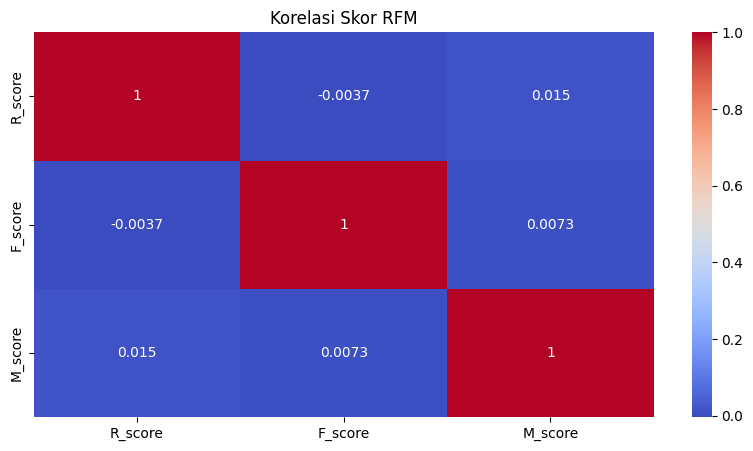

<ipython-input-60-8b7ac51b9735>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')


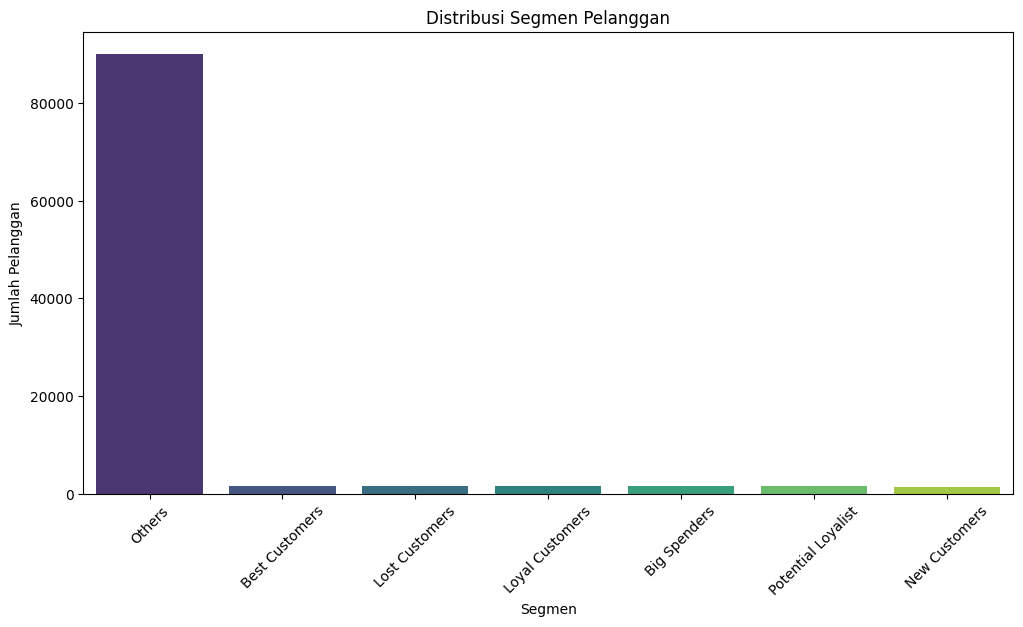

                        customer_id  recency  frequency  monetary R_score  \
0  00012a2ce6f8dcda20d059ce98491703      337          1    114.74       2   
1  000161a058600d5901f007fab4c27140      458          1     67.41       1   
2  0001fd6190edaaf884bcaf3d49edf079      596          1    195.42       1   
3  0002414f95344307404f0ace7a26f1d5      427          1    179.35       1   
4  000379cdec625522490c315e70c7a9fb      198          1    107.01       3   

  F_score M_score RFM_score Segment  
0       1       3       213  Others  
1       1       2       112  Others  
2       1       4       114  Others  
3       1       4       114  Others  
4       1       3       313  Others  


In [60]:
# Menentukan tanggal referensi (tanggal terakhir dalam dataset)
reference_date = orders['order_purchase_timestamp'].max()

# Menghitung Recency (R)
recency_df = orders.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
recency_df['recency'] = (reference_date - recency_df['order_purchase_timestamp']).dt.days
recency_df.drop(columns=['order_purchase_timestamp'], inplace=True)

# Menghitung Frequency (F)
frequency_df = orders.groupby('customer_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)

# Memastikan customer_id ada di payments dengan menggabungkan dengan orders
payments = payments.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')

# Menghitung Monetary (M)
monetary_df = payments.groupby('customer_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)

# Menggabungkan semua metrik RFM
rfm_df = recency_df.merge(frequency_df, on='customer_id').merge(monetary_df, on='customer_id')

# Memberikan skor untuk setiap metrik RFM
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'].rank(method='first'), q=4, labels=[1, 2, 3, 4])

# Menggabungkan skor menjadi satu RFM Score
rfm_df['RFM_score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Menentukan segmen pelanggan berdasarkan skor RFM
seg_map = {
    '444': 'Best Customers',
    '344': 'Loyal Customers',
    '434': 'Big Spenders',
    '144': 'New Customers',
    '111': 'Lost Customers',
    '411': 'Potential Loyalist'
}

rfm_df['Segment'] = rfm_df['RFM_score'].map(seg_map).fillna('Others')

# Visualisasi Distribusi RFM
plt.figure(figsize=(10,5))
sns.heatmap(rfm_df[['R_score', 'F_score', 'M_score']].astype(int).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Skor RFM")
plt.show()

# Visualisasi Distribusi Segmen Pelanggan
plt.figure(figsize=(12,6))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribusi Segmen Pelanggan")
plt.xlabel("Segmen")
plt.ylabel("Jumlah Pelanggan")
plt.show()

# Menampilkan hasil akhir
print(rfm_df.head())


**Insight**
- Tidak ada korelasi kuat antara Recency, Frequency, dan Monetary.
- Mayoritas pelanggan masuk kategori "Others".
- Best Customers, Loyal Customers, dan Big Spenders perlu strategi khusus.(seperti diberikan keuntungan semakin sering berbelanja mendapat diskon dan sebagainya)





## Conclusion

1. CONCLUSION PERTANYAAN PERTAMA
- Keterlambatan pengiriman dipengaruhi oleh kategori produk dan lokasi pelanggan. Produk berukuran besar seperti elektronik dan furniture lebih sering mengalami keterlambatan. Selain itu, kota dengan akses logistik yang sulit juga memiliki tingkat keterlambatan pengiriman yang lebih tinggi.
2. CONCLUSION PERTANYAAN KEDUA
- Metode pembayaran memengaruhi total transaksi dan tingkat pengembalian produk. Kartu kredit dan boleto bancário sering digunakan untuk transaksi dalam jumlah besar. Beberapa metode pembayaran juga lebih rentan terhadap retur produk, yang dapat berdampak pada efisiensi operasional.
3. ANALISIS LANJUTAN
- Tidak ada korelasi kuat antara Recency, Frequency, dan Monetary, menunjukkan bahwa pelanggan yang baru bertransaksi tidak selalu sering atau memiliki nilai belanja tinggi. Mayoritas pelanggan berada dalam kategori "Others", sementara segmen Best Customers, Loyal Customers, dan Big Spenders memerlukan strategi khusus seperti program loyalitas dan insentif agar mereka tetap aktif bertransaksi.